In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

%matplotlib inline

In [2]:
def create_plots(df,stock,color1,color2,band_color):
    start = '2019'
    end = '2020'
    pd.concat([df.head(), df.tail()])
    #df['Close'].pct_change().hist(bins=50)
    # 30 days is a good approximation of a single month
    df['30d mavg'] = df['Close'].rolling(window=30).mean()
    df['30d std'] = df['Close'].rolling(window=30).std()

    df['Upper Band'] = df['30d mavg'] + (df['30d std'] * 2)
    df['Lower Band'] = df['30d mavg'] - (df['30d std'] * 2)
    # create a list of the column names we are interested in plotting

    cols = ['30d mavg','Upper Band','Lower Band', 'Close']

    df_Boll = df[cols][end]
    #df_Boll.plot()
    # set style, empty figure and axes
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)

    # Get index values for the X axis for the DataFrame
    x_axis = df_Boll.index.get_level_values(0)

    # Plot shaded 'win' Day Bollinger Band for Facebook
    ax.fill_between(x_axis, 
                    df_Boll['Upper Band'], 
                    df_Boll['Lower Band'], 
                    color=band_color)

    ax.plot(x_axis, df_Boll['Close'], color=color1, lw=2)
    ax.plot(x_axis, df_Boll['30d mavg'], color=color2, lw=2)

    # Set Title & Show the Image
    ax.set_title('January 2020 to Current Day Bollinger Band For '+stock)
    ax.set_xlabel('Date (Year/Month)')
    ax.set_ylabel('Price(USD)')
    plt.show()
    return ax

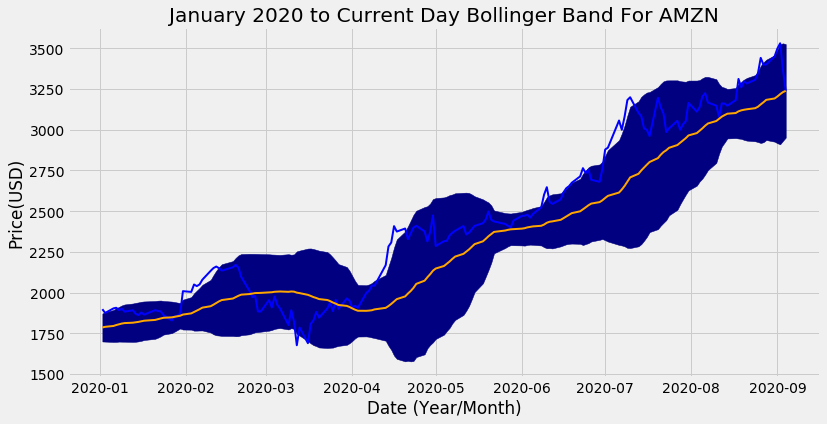

In [12]:
df_amazon = pdr.get_data_yahoo('AMZN', '2000-01-01')
create_plots(df_amazon,'AMZN','blue','orange','navy')

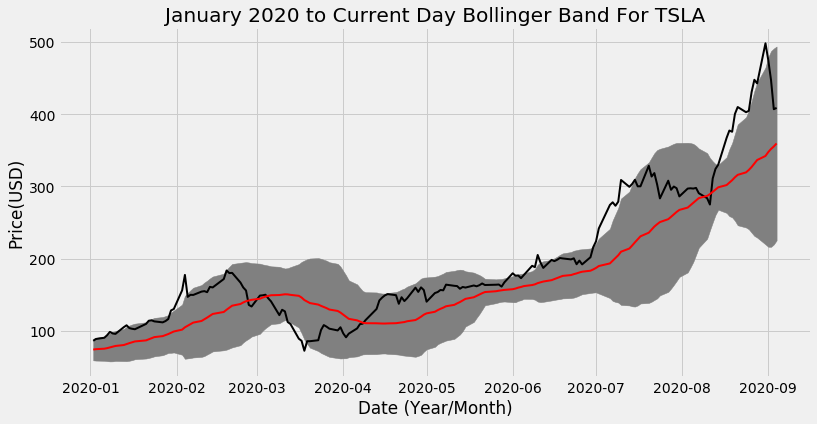

In [13]:
df_tsla = pdr.get_data_yahoo('TSLA', '2000-01-01')
create_plots(df_tsla,'TSLA','black','red','grey')

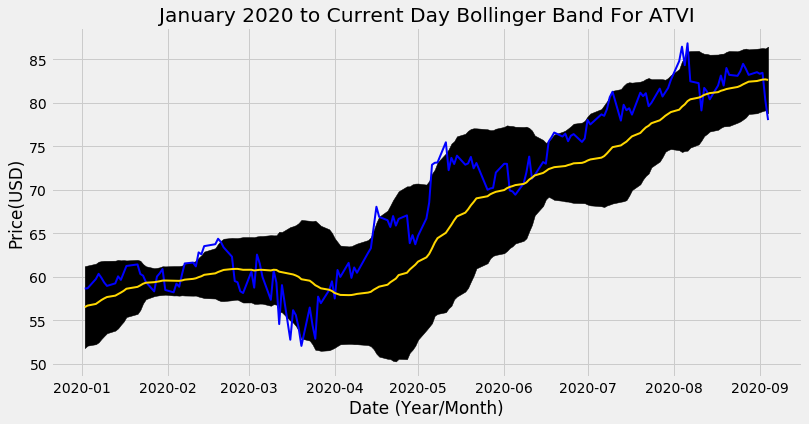

In [14]:
df_blizzard = pdr.get_data_yahoo('ATVI', '2000-01-01')
create_plots(df_blizzard,'ATVI','blue','gold','black')

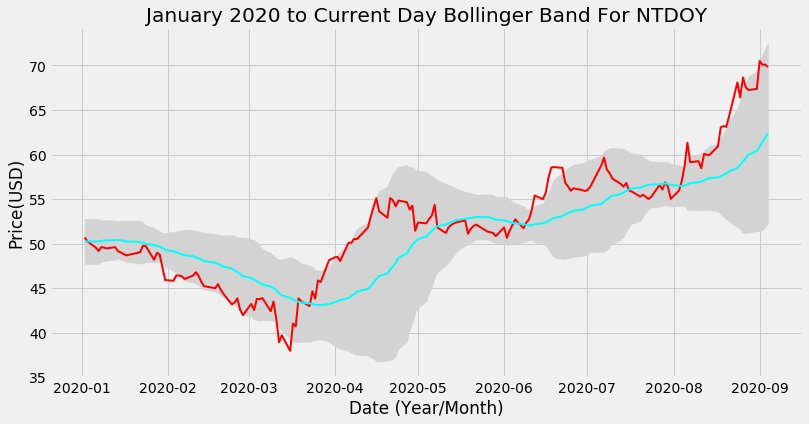

In [15]:
df_nintendo = pdr.get_data_yahoo('NTDOY', '2000-01-01')
nintendo_ax = create_plots(df_nintendo,'NTDOY','red','cyan','lightgrey')

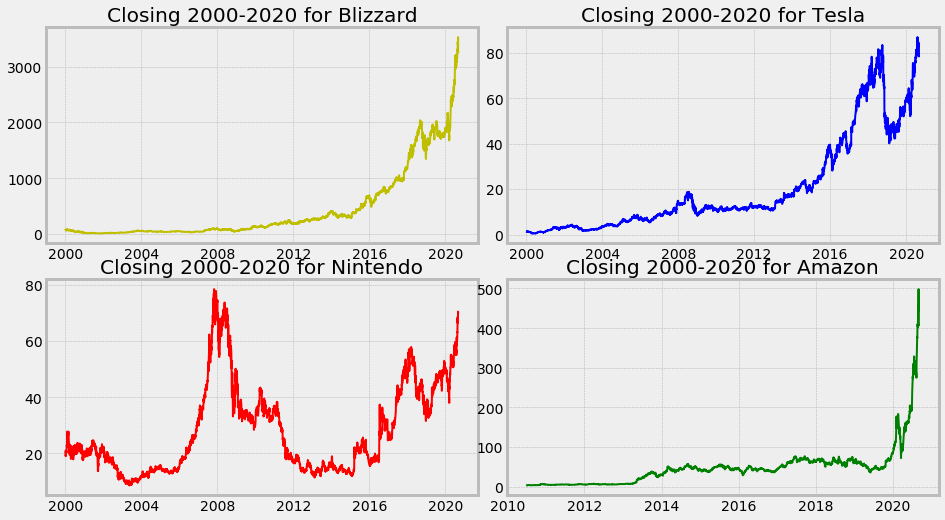

In [17]:
plt.style.use('bmh')
fig = plt.figure(figsize=(20, 10))
#axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.18, 0.6, 0.3, 0.3])
axes3 = fig.add_axes([0.50, 0.95, 0.3, 0.3])
axes4 = fig.add_axes([0.18, 0.95, 0.3, 0.3])
axes5 = fig.add_axes([0.50, 0.6, 0.3, 0.3])
x = df_nintendo.index.date
y1 = df_nintendo['Close']
axes2.plot(x, y1, 'r')
axes2.set_title('Closing 2020 for Nintendo')

x = df_tsla.index.date
y1 = df_tsla['Close']
axes5.plot(x, y1, 'g')

x = df_blizzard.index.date
y1 = df_blizzard['Close']
axes3.plot(x, y1, 'b')

x = df.index.date
y1 = df['Close']
axes4.plot(x, y1, 'y')

axes2.set_title('Closing 2000-2020 for Nintendo')
axes3.set_title('Closing 2000-2020 for Tesla')
axes4.set_title('Closing 2000-2020 for Blizzard')
axes5.set_title('Closing 2000-2020 for Amazon')
#print(df_nintendo)
#x = df_nintendo.index.date
#y1 = df_nintendo[]

plt.show()

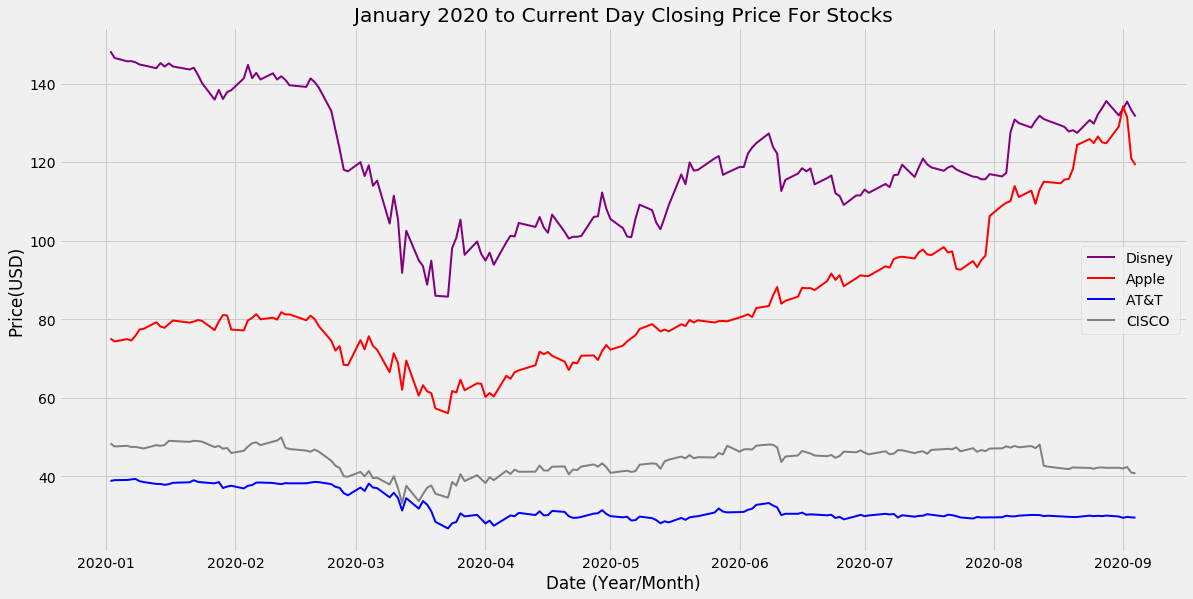

In [8]:
def plot_four(df1, df2, df3, df4, label1, label2, label3, label4):
    # set style, empty figure and axes
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)

    x_axis = df1.index.get_level_values(0)

    line1 = ax.plot(x_axis, df1, color='purple', lw=2, label=label1)
    line2 = ax.plot(x_axis, df2, color='red', lw=2, label=label2)
    line3 = ax.plot(x_axis, df3, color='blue', lw=2, label=label3)
    line4 = ax.plot(x_axis, df4, color='grey', lw=2, label=label4)

    ax.set_title('January 2020 to Current Day Closing Price For Stocks')
    ax.set_xlabel('Date (Year/Month)')
    ax.set_ylabel('Price(USD)')
    ax.legend()
    
df_dis = pdr.get_data_yahoo('DIS', '2000-01-01')
df_dis_ax = df_dis['Close']['2020']

df_apple = pdr.get_data_yahoo('AAPL', '2000-01-01')
df_apple_ax = df_apple['Close']['2020']

df_att = pdr.get_data_yahoo('T', '2000-01-01')
df_att_ax = df_att['Close']['2020']

df_csco = pdr.get_data_yahoo('CSCO', '2000-01-01')
df_csco_ax = df_csco['Close']['2020']

plot_four(df_dis_ax,df_apple_ax,df_att_ax,df_csco_ax,"Disney","Apple","AT&T","CISCO")

In [1]:
'''
def getBollingerBandInfo(df):
    df['30d mavg'] = df['Close'].rolling(window=30).mean()
    df['30d std'] = df['Close'].rolling(window=30).std()
    df['Upper Band'] = df['30d mavg'] + (df['30d std'] * 2)
    df['Lower Band'] = df['30d mavg'] - (df['30d std'] * 2)
    #return upper, lower
    return df['Upper Band','Lower Band']

def plot_four_bands(df1, df2, df3, df4, label1, label2, label3, label4):
    # set style, empty figure, axes, & index
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)
    x_axis = df1.index.get_level_values(0)

    line1 = ax.plot(x_axis, df1, color='purple', lw=2, label=label1)
    line2 = ax.plot(x_axis, df2, color='red', lw=2, label=label2)
    line3 = ax.plot(x_axis, df3, color='blue', lw=2, label=label3)
    line4 = ax.plot(x_axis, df4, color='grey', lw=2, label=label4)

    
    df1_upper, df1_lower = getBollingerBandInfo(df1)
    #df2_upper, df2_lower = getBollingerBandInfo(df2)
    #df3_upper, df3_lower = getBollingerBandInfo(df3)
    #df4_upper, df4_lower = getBollingerBandInfo(df4)

    ax.fill_between(x_axis, df1_upper, df1_lower, color=purple, label=label1)
    #ax.fill_between(x_axis, df2_upper, df2_lower, color=purple, label=label2)
    #ax.fill_between(x_axis, df3_upper, df3_lower, color=purple, label=label3)
    #ax.fill_between(x_axis, df4_upper, df4_lower, color=purple, label=label4)

    ax.set_title('January 2020 to Current Day Closing Price For Stocks')
    ax.set_xlabel('Date (Year/Month)')
    ax.set_ylabel('Price(USD)')
    ax.legend()

df_dis = pdr.get_data_yahoo('DIS', '2000-01-01')
df_dis_ax = df_dis['Close']['2020']

df_apple = pdr.get_data_yahoo('AAPL', '2000-01-01')
df_apple_ax = df_apple['Close']['2020']

df_att = pdr.get_data_yahoo('T', '2000-01-01')
df_att_ax = df_att['Close']['2020']

df_csco = pdr.get_data_yahoo('CSCO', '2000-01-01')
df_csco_ax = df_csco['Close']['2020']

#getBollingerBandInfo(df_dis_ax)
plot_four_bands(df_dis_ax,df_apple_ax,df_att_ax,df_csco_ax,"Disney","Apple","AT&T","CISCO")
'''
#Thoughts:
#We want a function that takes in the 4 dataframes and plots the bands between upper and lower bands
#Gonna have to call a secondary function to get extra info about each to ensure code is not repeated too much
#So the secondary function takes in the df's and returns the data needed to plot

'\ndef getBollingerBandInfo(df):\n    df[\'30d mavg\'] = df[\'Close\'].rolling(window=30).mean()\n    df[\'30d std\'] = df[\'Close\'].rolling(window=30).std()\n    df[\'Upper Band\'] = df[\'30d mavg\'] + (df[\'30d std\'] * 2)\n    df[\'Lower Band\'] = df[\'30d mavg\'] - (df[\'30d std\'] * 2)\n    #return upper, lower\n    return df[\'Upper Band\',\'Lower Band\']\n\ndef plot_four_bands(df1, df2, df3, df4, label1, label2, label3, label4):\n    # set style, empty figure, axes, & index\n    plt.style.use(\'fivethirtyeight\')\n    fig = plt.figure(figsize=(18,9))\n    ax = fig.add_subplot(111)\n    x_axis = df1.index.get_level_values(0)\n\n    line1 = ax.plot(x_axis, df1, color=\'purple\', lw=2, label=label1)\n    line2 = ax.plot(x_axis, df2, color=\'red\', lw=2, label=label2)\n    line3 = ax.plot(x_axis, df3, color=\'blue\', lw=2, label=label3)\n    line4 = ax.plot(x_axis, df4, color=\'grey\', lw=2, label=label4)\n\n    \n    df1_upper, df1_lower = getBollingerBandInfo(df1)\n    #df2_upper